In [1]:
#import scrublet as scr
import numpy as np
import pandas as pd
import statistics as st
import re
import csv
import scanpy as sc 
import scanpy.external as sce
import phate
import matplotlib
from matplotlib import pyplot as plt
import warnings
from scipy.stats import binom
from scipy.stats import multinomial
import seaborn
from scipy.stats import hypergeom
import warnings
warnings.filterwarnings('ignore')
import scrublet as scr
import harmonypy as hm
from random import sample

### Load Dataset

In [2]:
#SC_DF = sc.read_h5ad('./Focused_SC_091121.h5ad')

### Downsample and Produce Heatmap of Grouped Cell Types

In [6]:
### Top 100 enriched genes per cluster
cluster0 = SC_DF.uns['rank_genes_groups']['names']['0'][0:100].tolist()
cluster1 = SC_DF.uns['rank_genes_groups']['names']['1'][0:100].tolist()
cluster2 = SC_DF.uns['rank_genes_groups']['names']['2'][0:100].tolist()
cluster3 = SC_DF.uns['rank_genes_groups']['names']['3'][0:100].tolist()

In [7]:
cluster2.extend(cluster1)
cluster2.extend(cluster0)
cluster2.extend(cluster3)
Cluster_Gene_List = cluster2

In [9]:
### Identify genes to plot in heatmap
Interest_Genes = ['SOX4', 'TTYH1', 'TNNT2','SOX2', 'TTR', 'EPCAM', 'NPPA', 'TTN']
Heatmap_Pos = []
for gene in Interest_Genes:
    Heatmap_Pos.append(Cluster_Gene_List.index(gene))

In [10]:
### Downsample cells to smallest cluster
Downsample_Value = SC_DF[SC_DF.obs.louvain == '2'].shape[0]


Sampled_Cells = []
for cluster in SC_DF.obs.louvain.cat.categories:
    cluster_mtx = SC_DF[SC_DF.obs.louvain == cluster]
    if cluster_mtx.shape[0] >= Downsample_Value:
        cluster_total = cluster_mtx.shape[0]
        Random_Numbers = [i for i in range(cluster_total)]
        Random_Positions = sample(Random_Numbers, Downsample_Value)
        Sampled_Cells.extend(cluster_mtx[Random_Positions].obs.index)
    else:
        Sampled_Cells.extend(cluster_mtx.obs.index)
Downsampled_DF = SC_DF[Sampled_Cells]

In [11]:
cluster_order = ['2', '1', '0', '3']

In [12]:
Expr_Values = []

for gene in Cluster_Gene_List:
    gene_values = []
    gene_pos = np.argwhere(Downsampled_DF.var.index == gene)[0][0]
    for cluster in cluster_order:
        cluster_mtx = Downsampled_DF[Downsampled_DF.obs.louvain == cluster]
        gene_values.extend(cluster_mtx.X[:,gene_pos].tolist())
    Expr_Values.append(gene_values)
Expression_Matrix = pd.DataFrame(Expr_Values, index = Cluster_Gene_List)

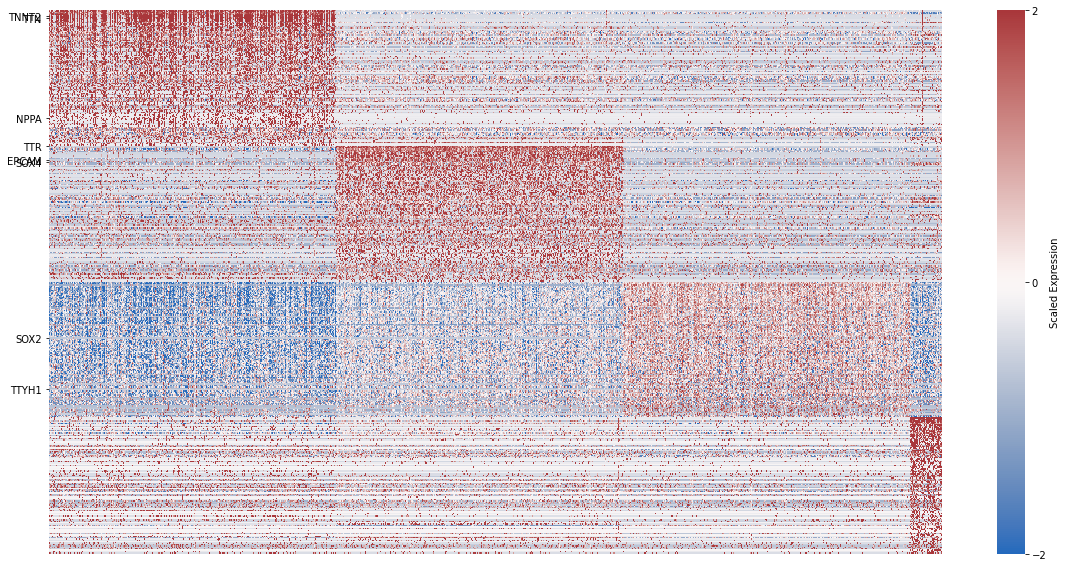

In [13]:
fig, ax = plt.subplots(1, figsize=(20,10))
h = seaborn.heatmap(Expression_Matrix, vmin=-2, vmax=2, cmap="vlag", cbar_kws={'ticks':[2,0,-2], 'label':'Scaled Expression'})
h.set_yticks(Heatmap_Pos)
h.set_yticklabels(Interest_Genes)
h.set_xticks([])
plt.savefig('./Transcriptome_Heatmap.png')

### UMAP Plot

In [14]:
query_region = '0'
Cluster_0 = []
for bc in SC_DF.obs.index:
    if SC_DF.obs.louvain[bc] == query_region:
        Cluster_0.append(1)
    else:
        Cluster_0.append(0)

In [15]:
query_region = '1'
Cluster_1 = []
for bc in SC_DF.obs.index:
    if SC_DF.obs.louvain[bc] == query_region:
        Cluster_1.append(1)
    else:
        Cluster_1.append(0)

In [16]:
query_region = '2'
Cluster_2 = []
for bc in SC_DF.obs.index:
    if SC_DF.obs.louvain[bc] == query_region:
        Cluster_2.append(1)
    else:
        Cluster_2.append(0)

In [17]:
query_region = '3'
Cluster_3 = []
for bc in SC_DF.obs.index:
    if SC_DF.obs.louvain[bc] == query_region:
        Cluster_3.append(1)
    else:
        Cluster_3.append(0)

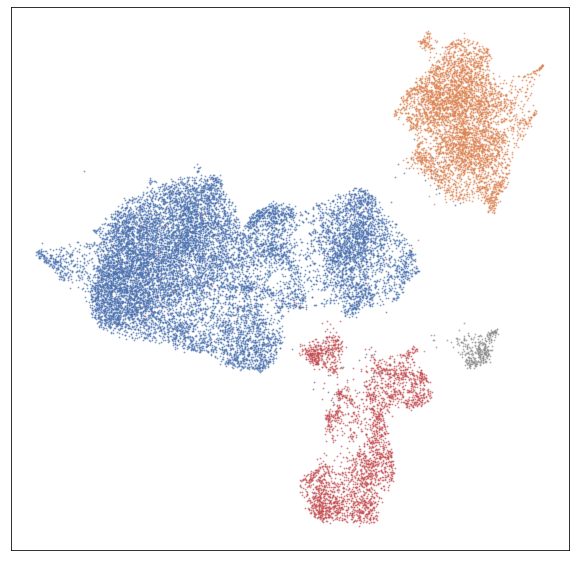

In [19]:
fig, ax = plt.subplots(figsize=(10,10))

indices = np.nonzero(Cluster_0)[0]
x = SC_DF.obsm['X_umap'][indices,0]
y = SC_DF.obsm['X_umap'][indices,1]
ax.scatter(x, 
           y, 
           c='#4c72b0',
           s=1,
        alpha=0.5)

indices = np.nonzero(Cluster_2)[0]
x = SC_DF.obsm['X_umap'][indices,0]
y = SC_DF.obsm['X_umap'][indices,1]
ax.scatter(x, 
           y, 
           c='#c44e52',
           s=1,
        alpha=0.5)    

indices = np.nonzero(Cluster_1)[0]
x = SC_DF.obsm['X_umap'][indices,0]
y = SC_DF.obsm['X_umap'][indices,1]
ax.scatter(x, 
           y, 
           c='#dd8452',
           s=1,
        alpha=0.5)


indices = np.nonzero(Cluster_3)[0]
x = SC_DF.obsm['X_umap'][indices,0]
y = SC_DF.obsm['X_umap'][indices,1]
ax.scatter(x, 
           y, 
           c='#8c8c8c',
           s=1,
        alpha=0.5)
                     
                     
ax.set_xticklabels([])
ax.set_yticklabels([])
ax.set_yticks([])
ax.set_xticks([])

ax.grid(False)

plt.savefig('./Transcriptome_Clustering.png', dpi = 600)